<a href="https://colab.research.google.com/github/AnnaSkrb/IDAL_IA3_Anna/blob/main/Copia_de_ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

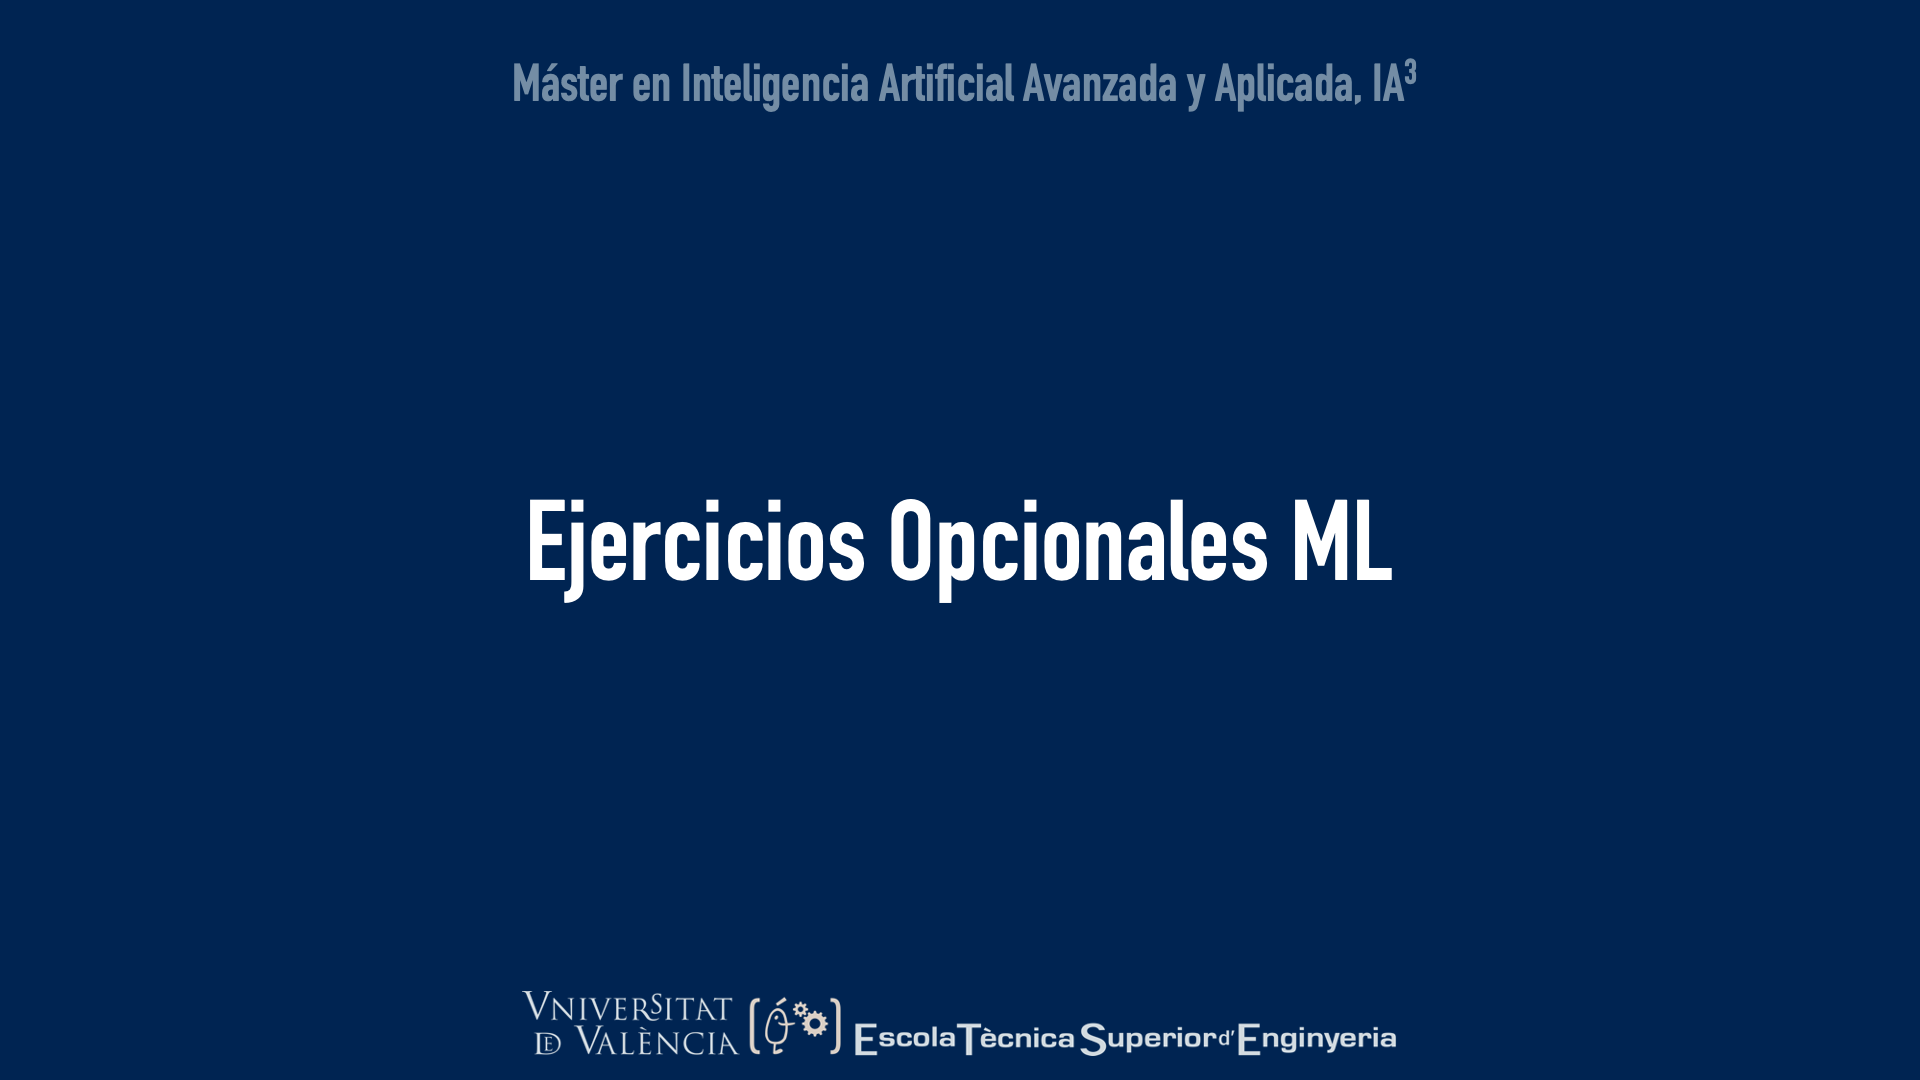

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

This notebook is done in collaboration between **Sergio Roldan**, **Anna Skorobogatova** and **Pablo Soriano** who form **DatAttack team**.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

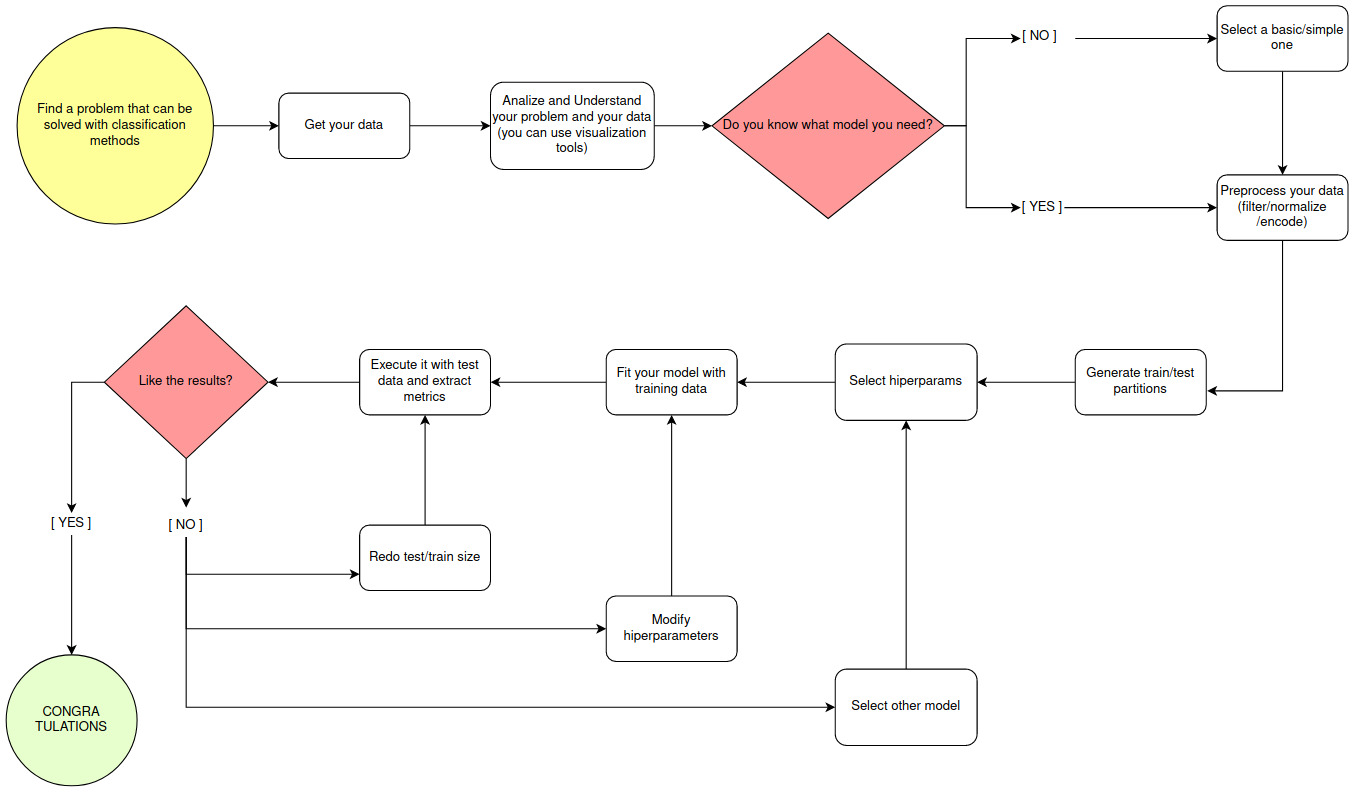

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the penguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
numeric = dataset.select_dtypes('number')
X = dataset.drop("sex", axis=1)
X_dummies = pd.get_dummies(X)
Y = dataset["sex"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.3, random_state=43)

To solve the penguins classification exercise we can try different algorithms and observe the behaviour of the model with each of them. Let´s first use **Naive Bayes** algorithm.

In [ ]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("Train:", model.score(X_train, Y_train))
print("Test:", model.score(X_test, Y_test))

Train: 0.7682403433476395
Test: 0.75


In [ ]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.75

The result are not bad but we can try to improve them. Let´s try to do it on the **Logistic Regression** example.

In [ ]:
model = LogisticRegression(max_iter=150)
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train:", model.score(X_train, Y_train))
print("Test:", model.score(X_test, Y_test))

Train: 0.8283261802575107
Test: 0.86


In [ ]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.86

Now, let´s see how it works with **Support Vector Machine** algorithm.

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.3, random_state=43)# Train a SVC model using different kernel
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, Y_train)# Make prediction
    Y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(Y_test,Y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

      Female       0.00      0.00      0.00        50
        Male       0.50      1.00      0.67        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100

Evaluation: RBF kernel
              precision    recall  f1-score   support

      Female       0.87      0.54      0.67        50
        Male       0.67      0.92      0.77        50

    accuracy                           0.73       100
   macro avg       0.77      0.73      0.72       100
weighted avg       0.77      0.73      0.72       100

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

      Female       0.00      0.00      0.00        50
        Male       0.50      1.00      0.67        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation: Linear kernel
              precision    recall  f1-score   support

      Female       0.93      0.80      0.86        50
        Male       0.82      0.94      0.88        50

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



So, we can observe that each algorithm performs differently on the same dataset which permits us to choose the optimal one.

Finding the correct algorithm is as important as tuning parameters as they control the overall behaviour of a ML model and are crucial for solving the ML problem.

From the obtained results, we can see that the model behaves better with the SVM algorithm. We trained it with several different kernels and the Linear kernel seems to be the most significant out of four. 